In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [5]:
diamonds_df = pd.read_csv('diamonds.csv' , index_col = 0)
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.5+ MB


Great! There is no null values


Attributes or features could be classified to quantitative data type and categorical data type

Quantitative data are : Carat, Depth, Table, Price, x, y and z.


Categorical data are : Cut, Color and Clarity. All of them are ordinal data (have a rank ordering associated with them).
 

# Data Cleaning

Check if there are duplicated rows

In [31]:
sum(diamonds_df.duplicated())

146

There are 146 duplicated rows, drop them

In [33]:
diamonds_df.drop_duplicates(inplace = True)

Check if they were dropped correctly

In [34]:
sum(diamonds_df.duplicated())

0

Dimensions of the diamond could not have zero values so we want to be sure that there is zeros in x,y and z columns

In [7]:
diamonds_df.query('x == 0 or y == 0 or z == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z
2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


These results are invalid inputs, data with x, y and z are equal to zero may have to be dropped 

In [9]:
diamonds_df.drop(diamonds_df.query('x == 0 and y == 0 and z == 0').index,inplace = True,axis = 0)

We can use table values to calculate the missing values in z according to this equation : depth = (2 * z / (x + y))*100

z = ((depth/100) * (x+y) /2)

In [39]:
diamonds_df['z'] = round(diamonds_df['depth'] * (diamonds_df['x'] + diamonds_df['y'])/200,2)

Recheck zero dimensions

In [43]:
diamonds_df.query('x == 0 or y == 0 or z == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z
11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,2.04


In [44]:
diamonds_df.drop(diamonds_df.query('x == 0').index,inplace = True,axis = 0)

In [45]:
diamonds_df.query('x == 0 or y == 0 or z == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z


# Data visualization

General look

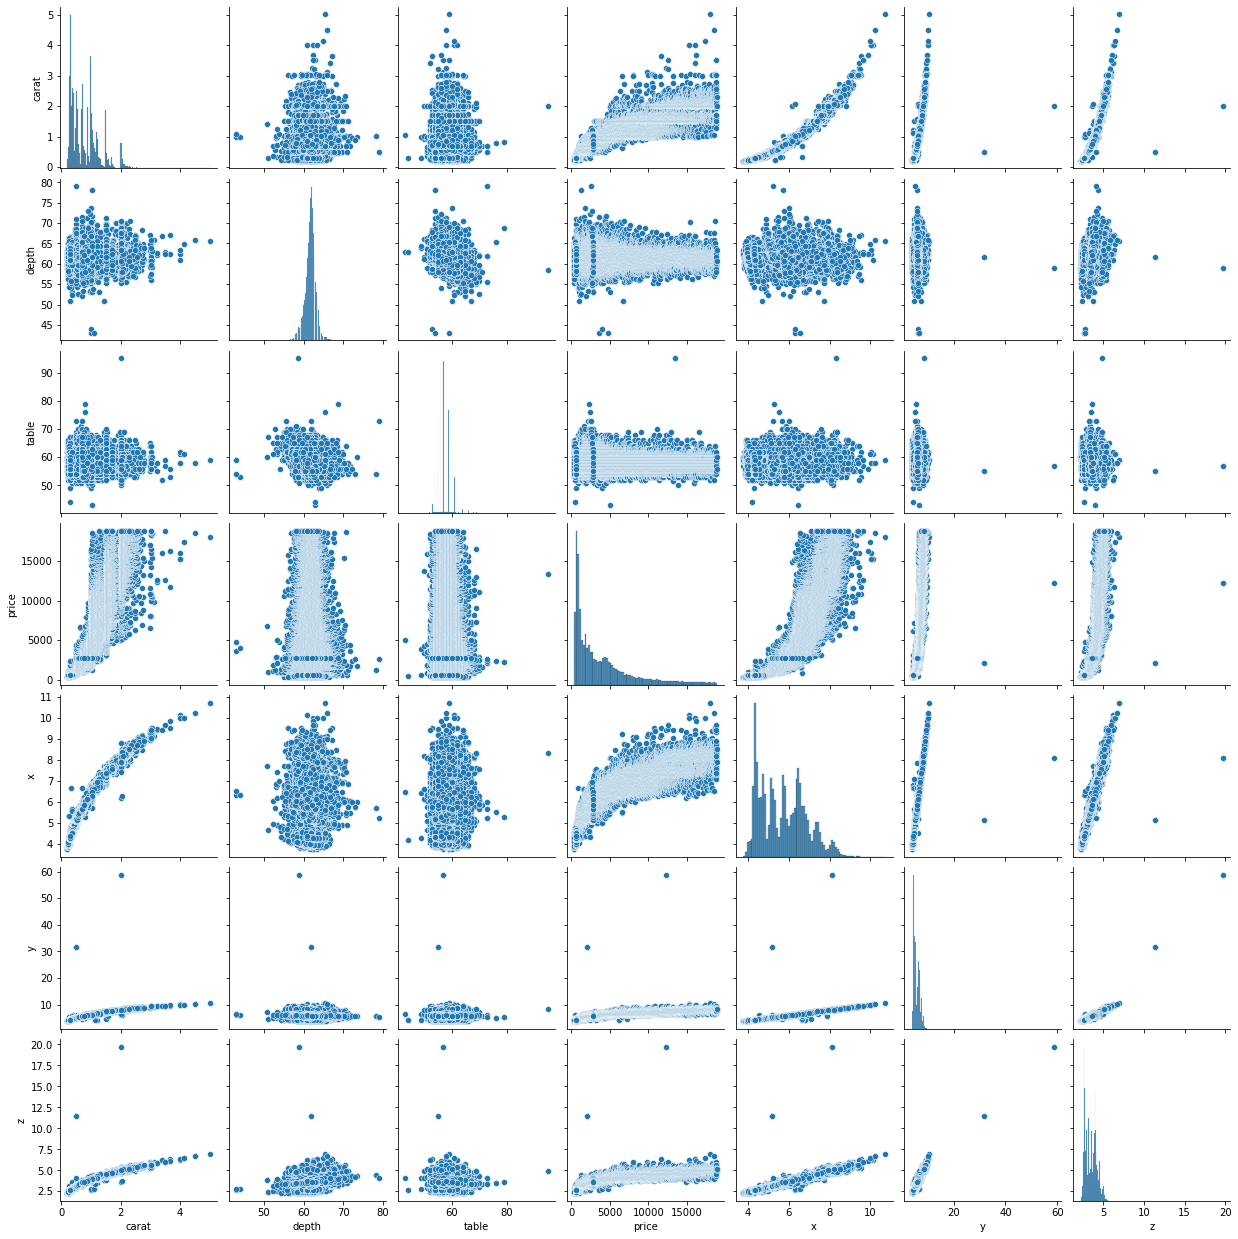

In [46]:
sns.pairplot(diamonds_df)

The plot shows that there are outliers in x,y and z dimensions, we can temporary remove them to see the plots and the relationships clearly

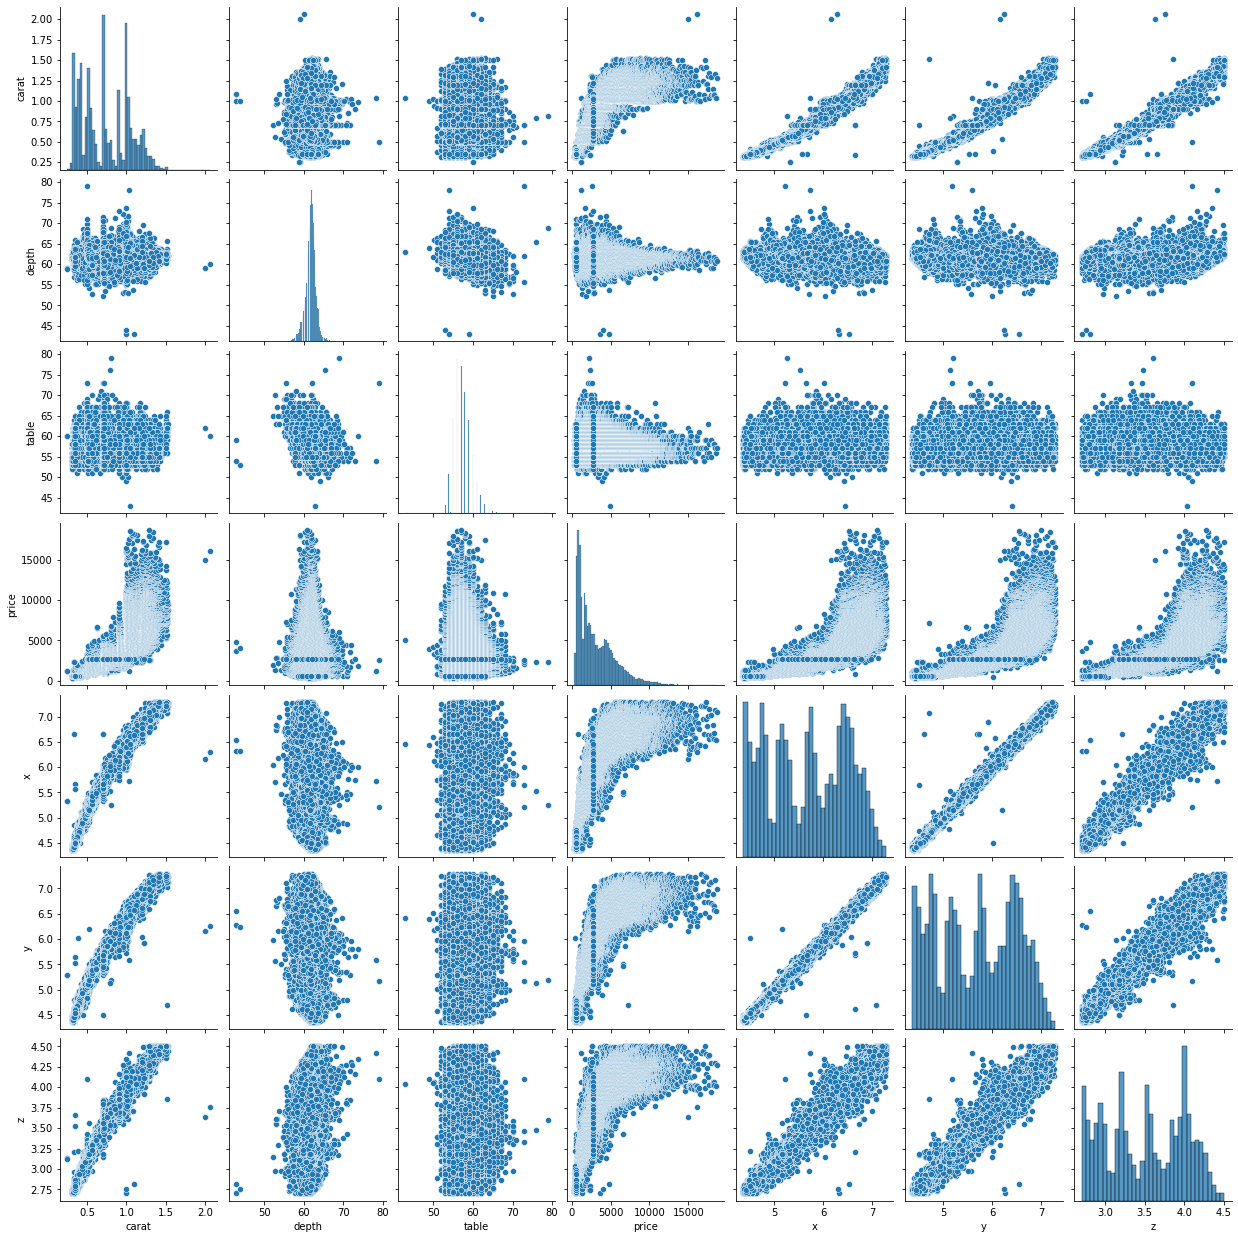

In [48]:
xMinValue = diamonds_df['x'].quantile(.10)
xMaxValue = diamonds_df['x'].quantile(.90)
yMinValue = diamonds_df['y'].quantile(.10)
yMaxValue = diamonds_df['y'].quantile(.90)
zMinValue = diamonds_df['z'].quantile(.10)
zMaxValue = diamonds_df['z'].quantile(.90)
diamonds_df_without_outliers = diamonds_df[(diamonds_df['x'] > xMinValue) & (diamonds_df['x'] < xMaxValue) 
                                           & (diamonds_df['y'] > yMinValue) & (diamonds_df['y'] < yMaxValue) 
                                           & (diamonds_df['z'] > zMinValue) & (diamonds_df['z'] < zMaxValue) ]
sns.pairplot(diamonds_df_without_outliers)

Correlations between data

<AxesSubplot:>

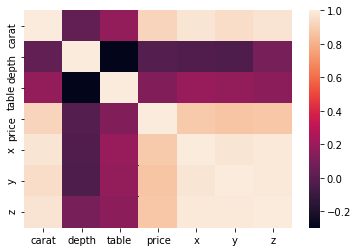

In [53]:
sns.heatmap(diamonds_df.corr(), )

Visualize the relationship between quantitative data and diamond price using scatter plots

<AxesSubplot:xlabel='carat', ylabel='price'>

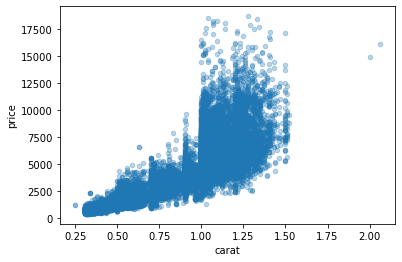

In [77]:
diamonds_df_without_outliers.plot(x = 'carat',y = 'price',kind = 'scatter', alpha = 0.3)

<AxesSubplot:xlabel='depth', ylabel='price'>

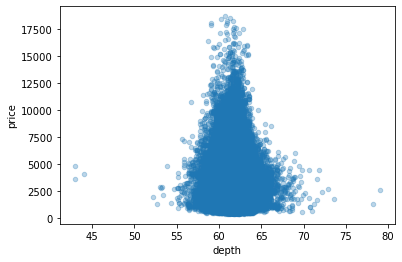

In [75]:
diamonds_df_without_outliers.plot(x = 'depth',y = 'price',kind = 'scatter', alpha = 0.3)

<AxesSubplot:xlabel='table', ylabel='price'>

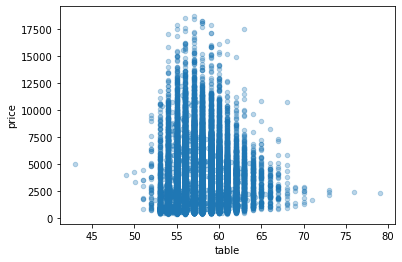

In [78]:
diamonds_df_without_outliers.plot(x = 'table',y = 'price',kind = 'scatter',alpha = 0.3)

<AxesSubplot:xlabel='x', ylabel='price'>

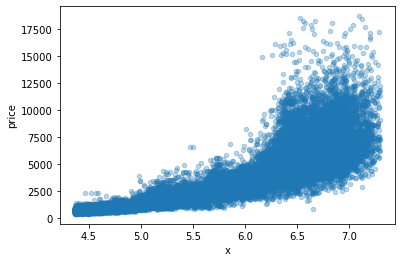

In [79]:
diamonds_df_without_outliers.plot(x = 'x',y = 'price',kind = 'scatter', alpha = 0.3)

<AxesSubplot:xlabel='y', ylabel='price'>

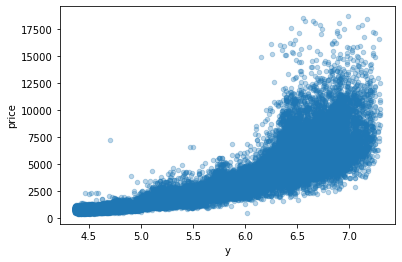

In [80]:
diamonds_df_without_outliers.plot(x = 'y',y = 'price',kind = 'scatter',alpha = 0.3)

<AxesSubplot:xlabel='z', ylabel='price'>

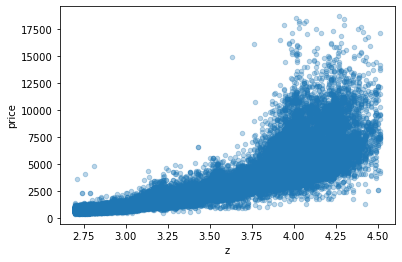

In [81]:
diamonds_df_without_outliers.plot(x = 'z',y = 'price',kind = 'scatter',alpha = 0.3)

Visualize the relationship between categorical data and diamond price using catplot

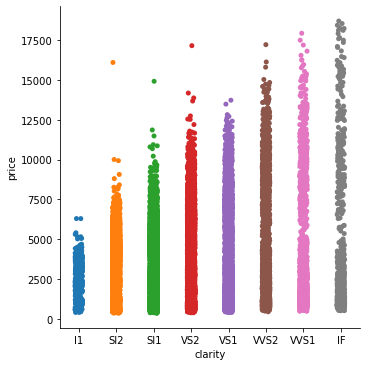

In [67]:
sns.catplot(x="clarity", y="price",order=["I1" , "SI2", "SI1", 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'], data= diamonds_df_without_outliers)

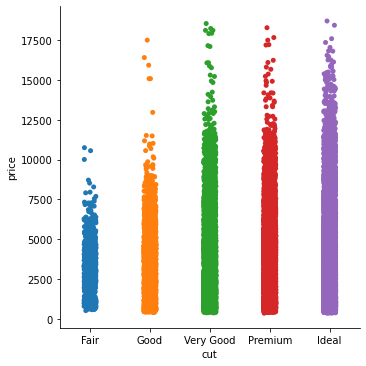

In [69]:
sns.catplot(x="cut", y="price",order=["Fair" , "Good", "Very Good", 'Premium', 'Ideal'], data= diamonds_df_without_outliers)

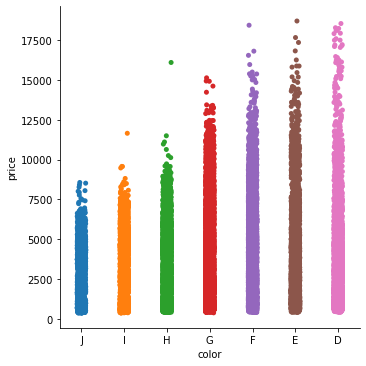

In [71]:
sns.catplot(x="color", y="price",order=['J','I','H','G','F','E','D'], data= diamonds_df_without_outliers)

Box plots can give us more information about the mean and the range of prices for each category

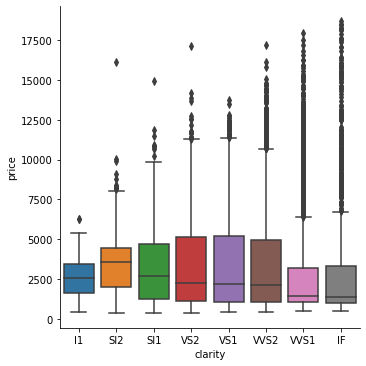

In [68]:
sns.catplot(x="clarity", y="price", order=["I1" , "SI2", "SI1", 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF'],data= diamonds_df_without_outliers, kind = 'box')

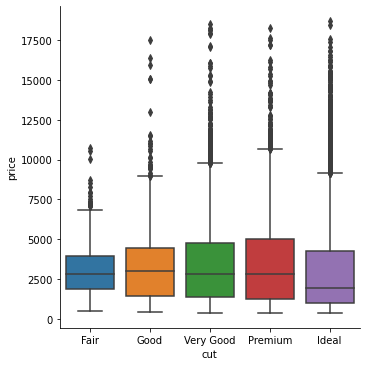

In [70]:
sns.catplot(x="cut", y="price",order=["Fair" , "Good", "Very Good", 'Premium', 'Ideal'],kind = 'box', data= diamonds_df_without_outliers)

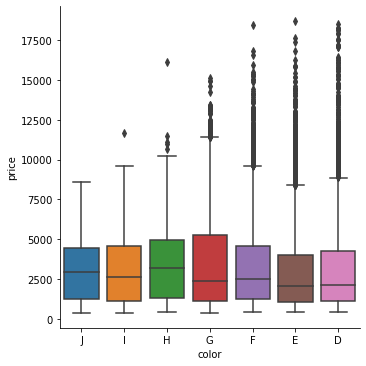

In [72]:
sns.catplot(x="color", y="price",order=['J','I','H','G','F','E','D'],kind = 'box', data= diamonds_df_without_outliers)